# Qui diferencia els salts d'absorbància milllor: *blau* o *saturació*?

In [48]:
import cv2 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imageproc import get_pocillos, complete_the_grid, draw_circles, array_from_pic, circle_crop

In [49]:
sequential_od_cam2 = '/Users/guillemcobos/Library/CloudStorage/GoogleDrive-guillem.cobos@koabiotech.com/.shortcut-targets-by-id/1UQ_YnLRmoAqhCue-qXYNP9QhYorsiAxS/KOA Biotech/01. AUTOMATA LAB/PROVA ABS/NEW ABS/Picture_s_10M5_#1_2023-05-09_15:57:23_P1_Cam2.jpg'
sequential_od_cam3 = '/Users/guillemcobos/Library/CloudStorage/GoogleDrive-guillem.cobos@koabiotech.com/.shortcut-targets-by-id/1UQ_YnLRmoAqhCue-qXYNP9QhYorsiAxS/KOA Biotech/01. AUTOMATA LAB/PROVA ABS/NEW ABS/Picture_s_10M5_#1_2023-05-09_15:57:24_P1_Cam3.jpg'

# Blaus

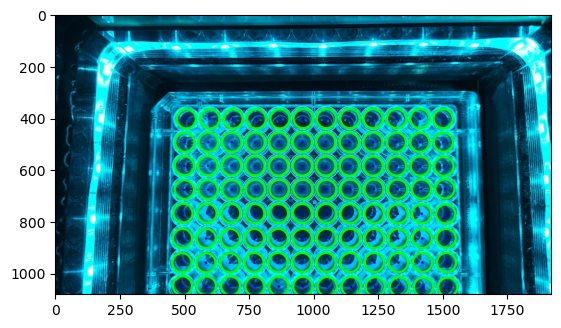

In [50]:
img = cv2.imread(sequential_od_cam2)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_bw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
circles = get_pocillos(img_bw)
new_circles = complete_the_grid(circles)
draw_circles(img, new_circles)
grid_positions = new_circles[:,3:5]

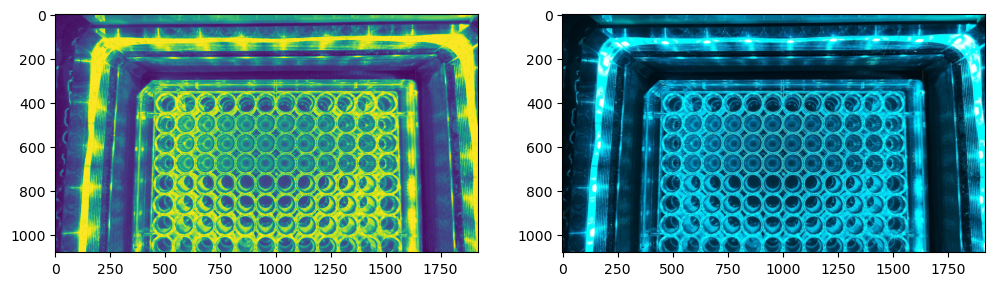

array([[121, 162, 134, 117, 101, 102, 108, 112, 122, 141, 166, 123],
       [148, 169, 162, 148, 139, 131, 130, 126, 128, 128, 132, 151],
       [134, 170, 159, 145, 137, 128, 127, 126, 126, 127, 127, 141],
       [133, 158, 151, 142, 133, 125, 124, 123, 123, 122, 123, 136],
       [113, 168, 145, 123, 107,  96,  98, 114, 135, 154, 175, 121],
       [115, 172, 159, 137, 123, 116, 117, 130, 145, 163, 172, 118],
       [128, 174, 172, 154, 146, 136, 139, 152, 160, 169, 177, 128],
       [ -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1]])

In [51]:
mean_output_array = np.zeros((8,12))
q_output_array = np.zeros((8,12))

for i, position in enumerate(grid_positions):
    cropped_pocillo = circle_crop(img, new_circles[i,0:3])
    cropped_pocillo = cropped_pocillo[:,:,2]
    pixel_values = cropped_pocillo[cropped_pocillo != 0].flatten()
    mean_output_array[position[0], position[1]] = np.mean(pixel_values)
    q_output_array[position[0], position[1]] = np.percentile(cropped_pocillo[cropped_pocillo != 0], 90)  

fig, axs = plt.subplots(1,2,figsize=(12, 12))   
axs[0].imshow(img[:,:,2])
axs[1].imshow(img)
plt.show()

mean_output_array.astype(int)

In [53]:
key_pocillos_blau = mean_output_array[1:4,1:10]
key_pocillos_blau

array([[169.85364717, 162.29200653, 148.47354929, 139.05756234,
        131.93614542, 130.43509671, 126.69867164, 128.604055  ,
        128.3192729 ],
       [170.74108599, 159.27895595, 145.88907015, 137.13773013,
        128.04730832, 127.17012351, 126.96201352, 126.9060825 ,
        127.0999767 ],
       [158.74831042, 151.75367047, 142.49172687, 133.44698206,
        125.85667677, 124.24376602, 123.29387089, 123.86017245,
        122.54183174]])

# Saturació

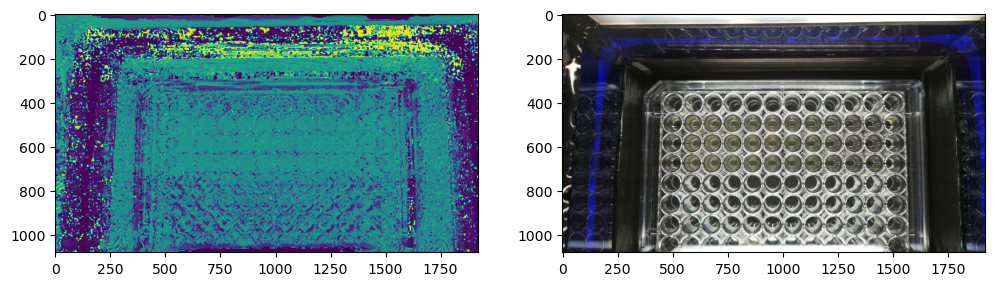

array([[21, 20, 18, 16, 16, 17, 18, 18, 18, 19, 21, 20],
       [40, 48, 47, 45, 44, 45, 44, 45, 46, 45, 41, 41],
       [42, 51, 50, 49, 49, 53, 46, 47, 49, 47, 46, 44],
       [41, 49, 47, 44, 45, 43, 43, 46, 47, 47, 42, 42],
       [18, 17, 16, 17, 16, 15, 16, 17, 17, 18, 17, 20],
       [16, 16, 16, 15, 14, 15, 17, 16, 15, 17, 17, 22],
       [18, 17, 17, 17, 15, 15, 14, 18, 18, 18, 19, 22],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]])

In [55]:
img = cv2.imread(sequential_od_cam3)
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

mean_output_array = np.zeros((8,12))
q_output_array = np.zeros((8,12))

for i, position in enumerate(grid_positions):
    cropped_pocillo = circle_crop(hsv, new_circles[i,0:3])
    cropped_pocillo = cropped_pocillo[:,:,1]
    pixel_values = cropped_pocillo[cropped_pocillo != 0].flatten()
    mean_output_array[position[0], position[1]] = np.mean(pixel_values)
    q_output_array[position[0], position[1]] = np.percentile(cropped_pocillo[cropped_pocillo != 0], 90)  

fig, axs = plt.subplots(1,2,figsize=(12, 12))   
axs[0].imshow(hsv[:,:,0])
axs[1].imshow(img)
plt.show()

mean_output_array.astype(int)

In [56]:
key_pocillos_saturacio = mean_output_array[1:4,1:10]
key_pocillos_saturacio

array([[48.65134189, 47.17525052, 45.45100327, 44.42787115, 45.15221445,
        44.80578223, 45.7121883 , 46.28351597, 45.90214853],
       [51.51096082, 50.27546027, 49.0198089 , 49.29969704, 53.17012351,
        46.77720811, 47.13752914, 49.81030063, 47.43649499],
       [49.37365967, 47.93731065, 44.46865533, 45.31158238, 43.92728968,
        43.58144955, 46.29617537, 47.9141791 , 47.4984845 ]])

# Contrastant mesures

In [57]:
import pandas as pd
readings = pd.read_excel('/Users/guillemcobos/Library/CloudStorage/GoogleDrive-guillem.cobos@koabiotech.com/.shortcut-targets-by-id/1UQ_YnLRmoAqhCue-qXYNP9QhYorsiAxS/KOA Biotech/01. AUTOMATA LAB/PROVA ABS/NEW ABS/Prueba abs dil seriadas 09052023.xlsx')

In [58]:
key_pocillos_readings = readings.iloc[3:10, 2:14].values[1:4,1:10]
key_pocillos_readings

array([[0.375, 0.3219, 0.2757, 0.2421, 0.2064, 0.1847, 0.1638, 0.1475,
        0.118],
       [0.3762, 0.3195, 0.2739, 0.251, 0.2153, 0.1884, 0.1713, 0.1496,
        0.1201],
       [0.3795, 0.3239, 0.2772, 0.2473, 0.2052, 0.1861, 0.1663, 0.1501,
        0.1184]], dtype=object)

Row  1


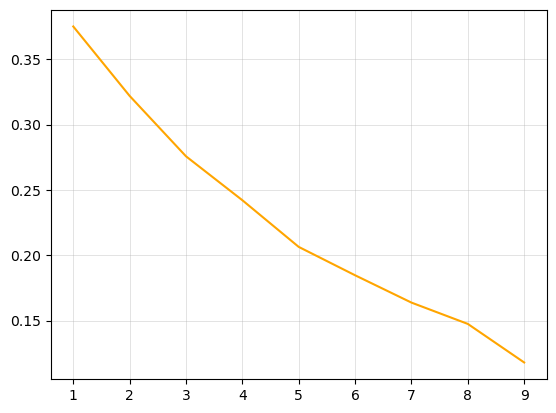

Row  2


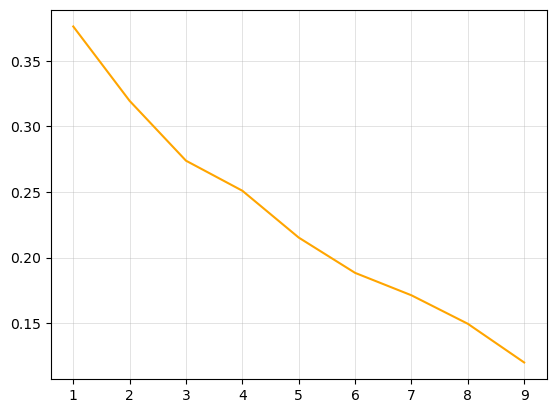

Row  3


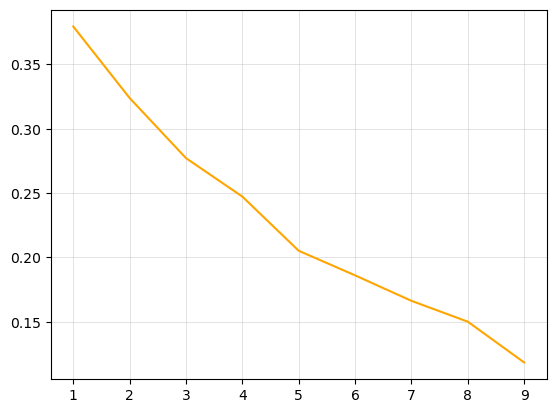

In [68]:
import matplotlib.pyplot as plt
for i in range(3):   
    print("Row ", i+1)
    plt.plot(np.arange(1,10), key_pocillos_readings[i,:], "orange")
    #plt.plot(np.arange(1,10), key_pocillos_saturacio[i,:])
    #plt.plot(np.arange(1,10), key_pocillos_blau[i,:])
    plt.grid(linewidth=0.5, alpha=0.5)
    plt.show()

Row  1


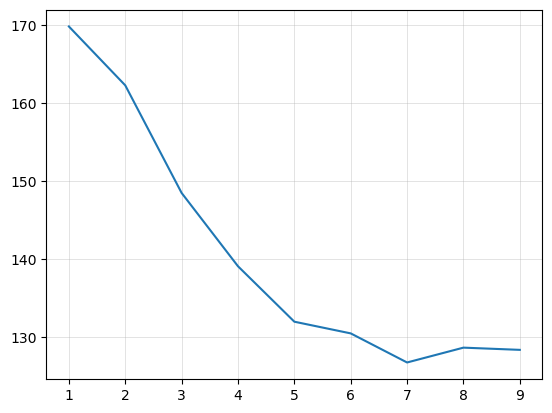

Row  2


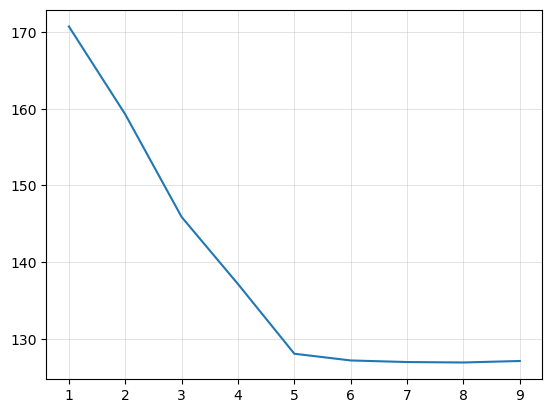

Row  3


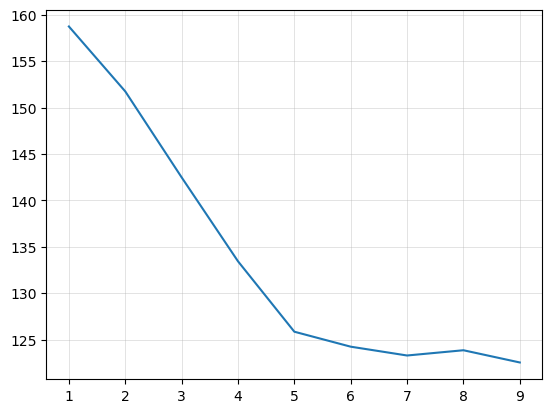

In [72]:
for i in range(3):   
    print("Row ", i+1)
    #plt.plot(np.arange(1,10), key_pocillos_readings[i,:], "orange")
    #plt.plot(np.arange(1,10), key_pocillos_saturacio[i,:])
    plt.plot(np.arange(1,10), key_pocillos_blau[i,:])
    plt.grid(linewidth=0.5, alpha=0.5)
    plt.show()